# Don't forget to manually create train and val folders inside data folder. Otherwise, files will silently be discarded

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] 
    # perform transformations on image
    b = cv2.distanceTransform(img, distanceType=cv2.DIST_L2, maskSize=5)
    g = cv2.distanceTransform(img, distanceType=cv2.DIST_L1, maskSize=5)
    r = cv2.distanceTransform(img, distanceType=cv2.DIST_C, maskSize=5)

    # merge the transformed channels back to an image
    transformed_image = cv2.merge((b, g, r))
    
    return transformed_image

In [3]:
root_dir = '../'
image_source_dir = os.path.join(root_dir, 'data/images/')
#image_file = 'Page_3.png'
#image_file = '0154_474.png'
image_file = '2306_093.png'



# open image file
img = cv2.imread(os.path.join(image_source_dir, image_file))
#img = img[:-200,:-100]# Borders removal
#img = img[300:550,200:600]# Borders removal # Patch


(3300, 2544, 3)


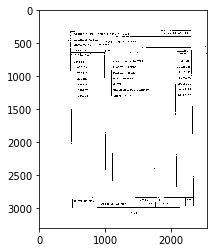

In [4]:
print(img.shape)
plt.imshow(img)

(3300, 2544)


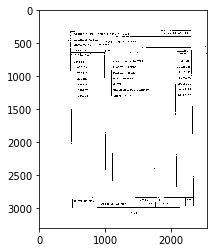

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] 
print(img_gray.shape)
plt.imshow(img_gray, cmap='gray')

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

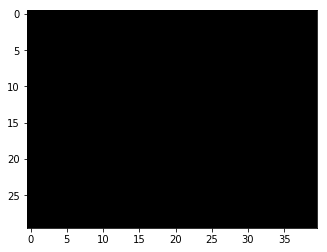

In [6]:
patch = img_gray[90:120, 120:160]
plt.imshow(patch, cmap='gray')
patch

In [7]:
#plt.hist(img)
print(np.max(img_gray))
print(np.mean(img_gray))
print(np.std(img_gray))
print(np.min(img_gray))


255
247.27977415666095
43.69274199428669
0


In [8]:
print(np.max(img))
print(np.mean(img))
print(np.std(img))
print(np.min(img))

255
247.27977415666095
43.69274199428705
0


In [9]:
b = cv2.distanceTransform(img_gray, distanceType=cv2.DIST_L1, maskSize=5)

In [10]:
print(np.max(b))
print(np.mean(b))
print(np.std(b))
print(np.min(b))

806.0
117.66408
116.47556
0.0


In [11]:
b.shape

(3300, 2544)

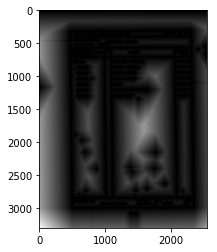

In [12]:
plt.imshow(b, cmap='gray')

In [13]:
b

array([[ 21.,  20.,  19., ...,  17.,  17.,  17.],
       [ 20.,  19.,  18., ...,  16.,  16.,  16.],
       [ 19.,  18.,  17., ...,  15.,  15.,  15.],
       ...,
       [804., 803., 802., ..., 506., 507., 508.],
       [805., 804., 803., ..., 507., 508., 509.],
       [806., 805., 804., ..., 508., 509., 510.]], dtype=float32)

In [14]:
b = cv2.distanceTransform(img_gray, distanceType=cv2.DIST_L2, maskSize=3)
g = cv2.distanceTransform(img_gray, distanceType=cv2.DIST_L1, maskSize=3)
r = cv2.distanceTransform(img_gray, distanceType=cv2.DIST_C, maskSize=3)

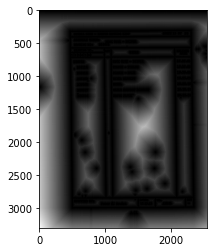

In [15]:
plt.imshow(b, cmap='gray')

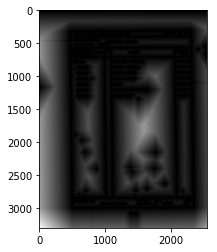

In [16]:
plt.imshow(g, cmap='gray')

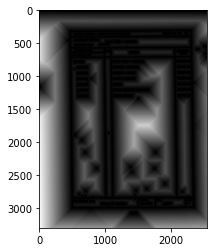

In [17]:
plt.imshow(r, cmap='gray')

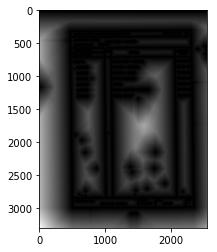

In [18]:
transformed_image = cv2.merge((b, g, r))
transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2GRAY)
plt.imshow(transformed_image, cmap='gray')

In [19]:
transformed_image = preprocess_image(img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3300, 2544, 3)


True

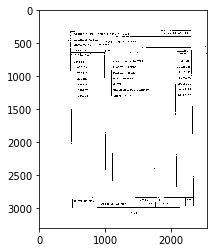

In [20]:

print(transformed_image.shape)
plt.imshow(transformed_image, cmap='gray')
cv2.imwrite('trans_' + image_file, transformed_image)

In [21]:
print(np.max(transformed_image))
print(np.mean(transformed_image))
print(np.std(transformed_image))
print(np.min(transformed_image))

806.0
110.77501
109.07713
0.0
